In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [141]:
df = pd.read_csv('D:/Introduce to AI/car_evaluation.csv', header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

print(df.columns)
print(df.eq(0).sum())

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [143]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [145]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [147]:
print(X.shape) 
print(set(y))  

(1728, 21)
{'unacc', 'good', 'acc', 'vgood'}


In [149]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(Dense(64, input_shape=(21,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 lớp đầu ra

model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy',  # dùng nếu y là số nguyên (0,1,2,3)
              metrics=['accuracy'])

model.summary()


D:\Tool File\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,620 (14.14 KB)

 Trainable params: 3,620 (14.14 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(df.drop('class', axis=1)).values
le = LabelEncoder()
Y = le.fit_transform(df['class'])  


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(20, input_shape=(21,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.1)

Y_pred = model.predict(X_test)
Y_pred_class = np.argmax(Y_pred, axis=1)


Epoch 1/30


D:\Tool File\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5735 - loss: 1.1826 - val_accuracy: 0.6259 - val_loss: 0.9692
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7278 - loss: 0.7943 - val_accuracy: 0.6475 - val_loss: 0.7897
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7555 - loss: 0.6111 - val_accuracy: 0.7266 - val_loss: 0.6467
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8016 - loss: 0.5127 - val_accuracy: 0.7770 - val_loss: 0.5590
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8354 - loss: 0.4058 - val_accuracy: 0.8201 - val_loss: 0.4820
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8840 - loss: 0.3214 - val_accuracy: 0.8417 - val_loss: 0.4309
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8868 - loss: 0.2902 - val_accuracy: 0.8633 - val_loss: 0.3878
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8924 - loss: 0.2647 - val_accuracy: 0.8417 - val_loss: 0.3521
Ep

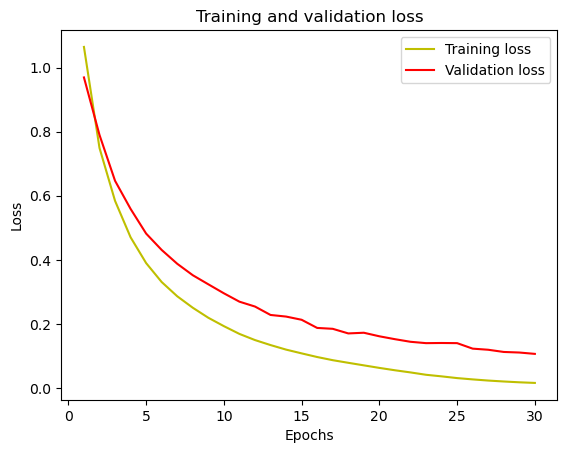

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

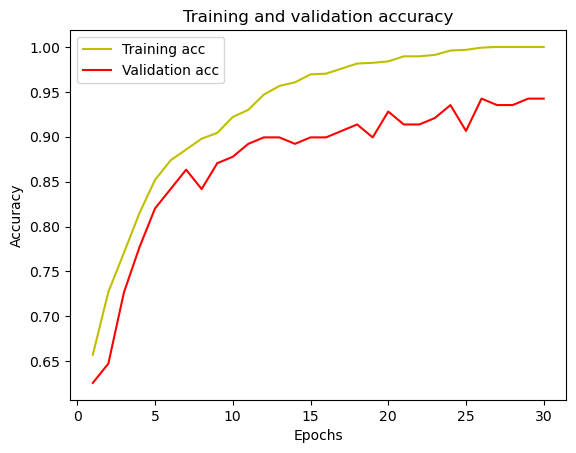

In [155]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [159]:
model.evaluate(X_test, Y_test)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9369 - loss: 0.1274 


[0.09709050506353378, 0.9595375657081604]